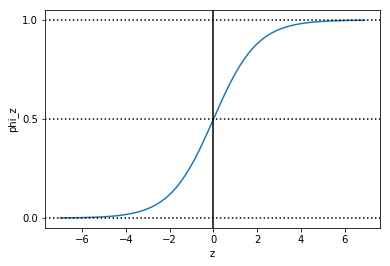

In [1]:
#sigmoid function
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.yticks([0.0, 0.5, 1.0])
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axvline(0.0, color='k')
plt.axhline(y=0.0, ls='dotted', color='k')
plt.axhline(y=1.0, ls='dotted', color='k')
plt.xlabel('z')
plt.ylabel('phi_z')
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)
weights, params = [], []
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)
print(X_train_std.shape, y_train.shape ,y_test.shape)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
print(y_combined.shape)

(105, 2) (105,) (45,)
(150,)


In [26]:
from matplotlib.colors import ListedColormap
def plt_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=1.0, c=cmap(cl),
                    marker=markers[cl], label=cl)
    X_test = X[test_idx, :]
    if test_idx:
        plt.scatter(X_test[:, 0], X_test[:, 1], c='purple',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')

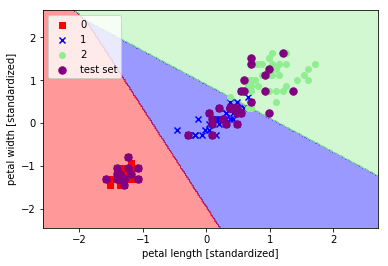

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plt_decision_regions(X_combined_std, y_combined, 
                        classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [28]:
lr.predict_proba(X_test_std[0:1,:])

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01]])

In [29]:
X_test_std[0,:],X_test_std[0:1,:]

(array([0.70793846, 1.50872803]), array([[0.70793846, 1.50872803]]))

In [30]:
lr.coef_

array([[-7.34015187, -6.64685581],
       [ 2.54373335, -2.3421979 ],
       [ 9.46617627,  6.44380858]])

In [31]:
np.unique(y)

array([0, 1, 2])

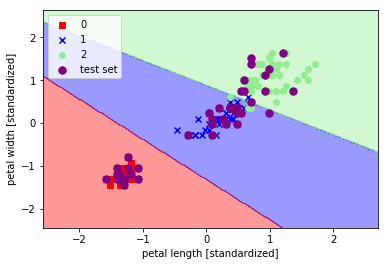

In [5]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1000.0, random_state=0)
svm.fit(X_train_std, y_train)
plt_decision_regions(X_combined_std,
                          y_combined, classifier=svm,
                          test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

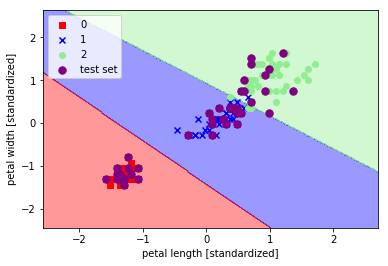

In [6]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plt_decision_regions(X_combined_std,
                          y_combined, classifier=svm,
                          test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

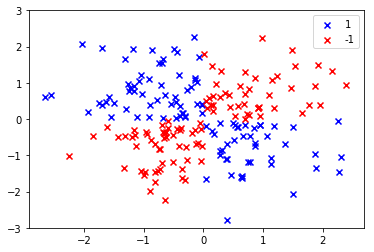

In [7]:
#Solving nonlinear problems using a kernel SVM
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
           c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
           c='r', marker='x', label='-1')
plt.ylim(-3, 3)
plt.legend()
plt.show()

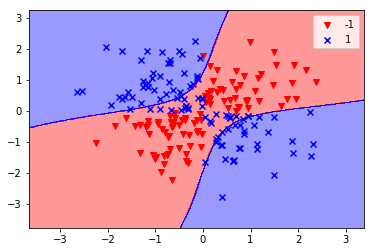

In [8]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=1.0)
svm.fit(X_xor, y_xor)
plt_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend()
plt.show()

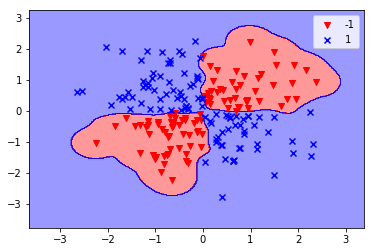

In [9]:
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1.0)
svm.fit(X_xor, y_xor)
plt_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend()
plt.show()

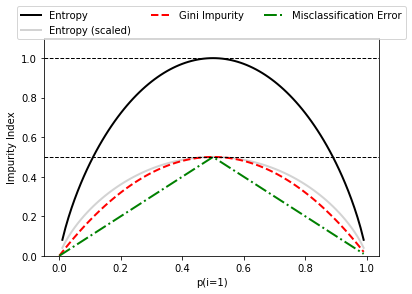

In [10]:
def gini(p):
    return p*(1-p)+(1-p)*(1-(1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p!=0 else None for p in x]
#print(ent)
sc_ent = [e*0.5 if e else None for e in ent]
#print(sc_ent)
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)', 'Gini Impurity','Misclassification Error'],
                          ['-', '-', '--', '-.'], ['black', 'lightgray','red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.17), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

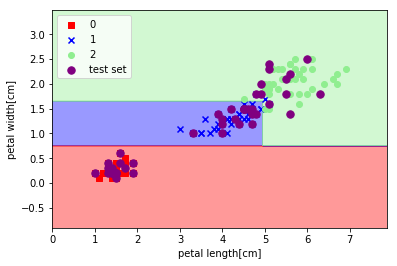

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plt_decision_regions(X_combined, y_combined, classifier=tree,  test_idx=range(105, 150))
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='upper left')
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


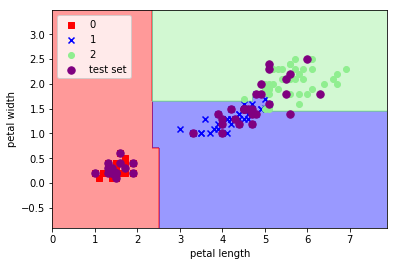

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, 
                               random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plt_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

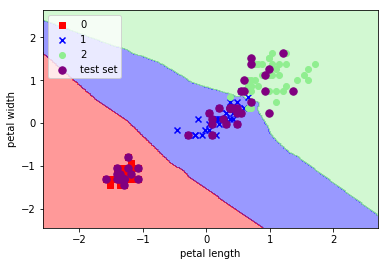

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plt_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()